# Project Ruby

Customer survey analysis

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)
    
def increase_axes(chart):
    chart.set_xlabel(
        chart.get_xlabel(), 
        fontsize='large'
    )
    chart.set_ylabel(
        chart.get_ylabel(), 
        fontsize='large'
    )

def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    
def create_countplot(data, x, save, order=None, ax=None, save_filename=None, hue=None, show_labels=False):
    if not ax:
        fig, ax = plt.subplots();
    
    if not save_filename:
        save_filename=x;
        
    chart = sns.countplot(ax=ax, data=data, x=x, order=order, hue=hue);
        
    rotate_xlabels(chart);
    increase_axes(chart);
    
    if show_labels:
        for p in ax.patches: 
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
    if save:
        save_figure(chart.get_figure(), save_filename);
        plt.show()
    return chart;
    
def create_histogram(data, name, save, ax=None, save_filename=None, hue=None, show_labels=False):
    if not ax:
        fig, ax = plt.subplots();
    if not save_filename:
        save_filename=name;

    chart = sns.histplot(ax=ax, data=data, hue=hue)
    increase_axes(chart);
    
    if show_labels:
        for p in ax.patches: 
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
    if save:
        save_figure(chart.get_figure(), save_filename)
        plt.show()
    return chart;

In [3]:
def anova_analysis(data, columns, variable, value):    
    data_combined = pd.melt(data[columns], var_name=variable, value_name=value)
    ols_string = value + ' ~ C(' + variable + ')';
    model = ols(ols_string, data_combined).fit()
    model.summary()

    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

    # Creates the ANOVA table
    display(sm.stats.anova_lm(model, typ= 2))

    #Post hoc test
    mc = statsmodels.stats.multicomp.MultiComparison(data_combined[value],data_combined[variable])
    mc_results = mc.tukeyhsd();
    print(mc_results);

In [89]:
def create_pie_chart(data, column, save, ax=None, save_filename=None):
    if not save_filename:
        save_filename=column;
        
    if not ax:
        fig, ax = plt.subplots()
    
    colors=sns.color_palette('pastel');
    n_yes = data[data[column]=="Yes"][column].count()
    n_no = survey_data[survey_data[column]=="No"][column].count()
    labels = ["Yes", "No"];
    data = [n_yes, n_no]
    ax.pie(data, colors=colors, autopct='%.0f%%');
    ax.legend(title="Answer", loc="center right", labels=labels, bbox_to_anchor=(1, 0, 0.25, 1))
    ax.set_title(column)
    
    if save:
        save_figure(fig, save_filename)
        plt.show()
    
    return ax;

In [4]:
sns.set(font_scale=1.1)
NO_YES = ["No", "Yes"]

# Data Preparation

In [5]:
survey_data = pd.read_csv("clean_survey_data.csv");
n_participants, n_columns = survey_data.shape # rows & columns
print(f"n_participants={n_participants: .0f}, n_columns={n_columns:.0f}")

n_participants= 292, n_columns=60


In [6]:
display(survey_data.isnull().sum()) # display null values

Gender                              0
Age                                 0
Income                              0
Education                           0
Relationship_Status                 0
Residence                           0
Home                                0
Number_Dogs                         0
Dog_Weights                         0
Weights_Less_10                     0
Weights_11_25                       0
Weights_91_120                      0
Weights_71_90                       0
Weights_41_70                       0
Weights_26_40                       0
Weights_Greater_120                 0
Security_Cameras                    0
Spend_Insurance                   171
Spend_Food                          2
Spend_Boarding                    181
Spend_Grooming                     97
Service_Animal                      0
Car_Seat                            0
Car_Seat_Retail                   141
Exercise                            0
Activities_Walk                     0
Activities_R

In [7]:
# display(survey_data.isnull().sum()) # display null values

# replace nulls with 0 in numeric fields
replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

## Demographics

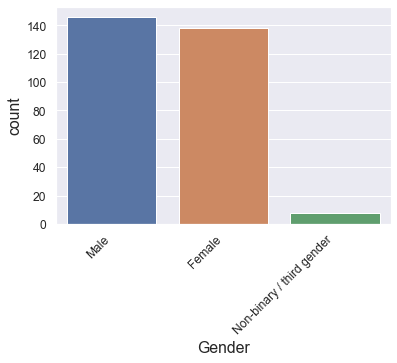

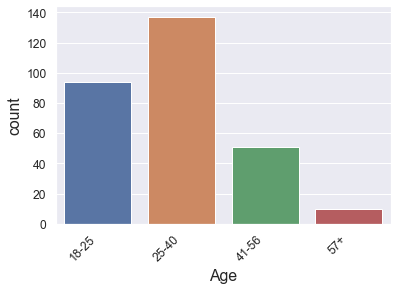

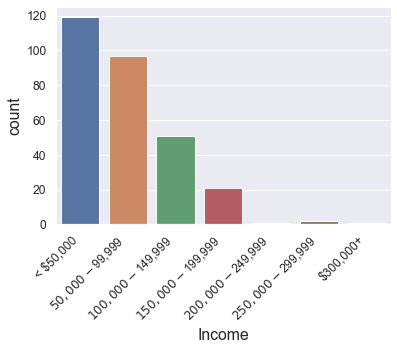

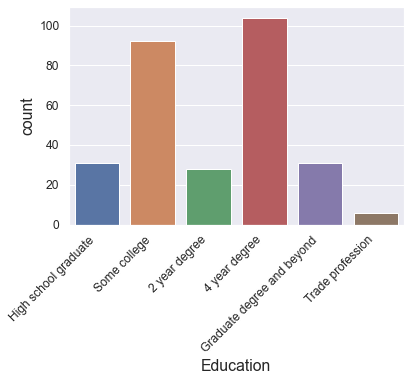

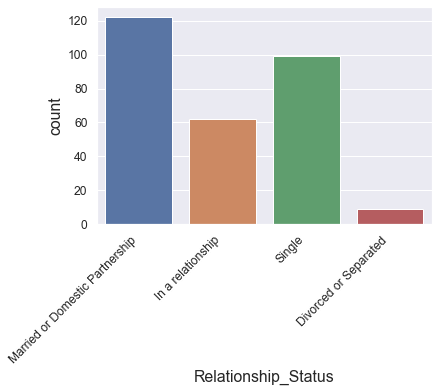

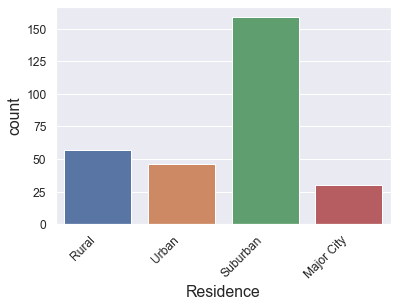

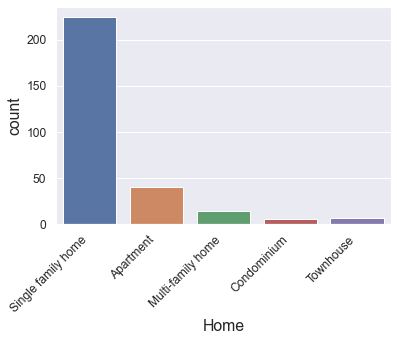

In [8]:
create_countplot(survey_data, "Gender", True);
create_countplot(survey_data, "Age", True, order=["18-25", "25-40", "41-56", "57+"]);
create_countplot(survey_data, "Income", True, 
                 order=[
                     '< $50,000', 
                     '$50,000 -$99,999', 
                     '$100,000 - $149,999',
                     '$150,000 - $199,999', 
                     '$200,000 - $249,999',
                     '$250,000 - $299,999', 
                     '$300,000+',
                 ]
                );
create_countplot(survey_data, "Education", True, 
                 order=[
                     'High school graduate',
                     'Some college', 
                     '2 year degree', 
                     '4 year degree',
                     'Graduate degree and beyond', 
                     'Trade profession'
                 ]
                );
create_countplot(survey_data, "Relationship_Status", True);
create_countplot(survey_data, "Residence", True);
create_countplot(survey_data, "Home", True);

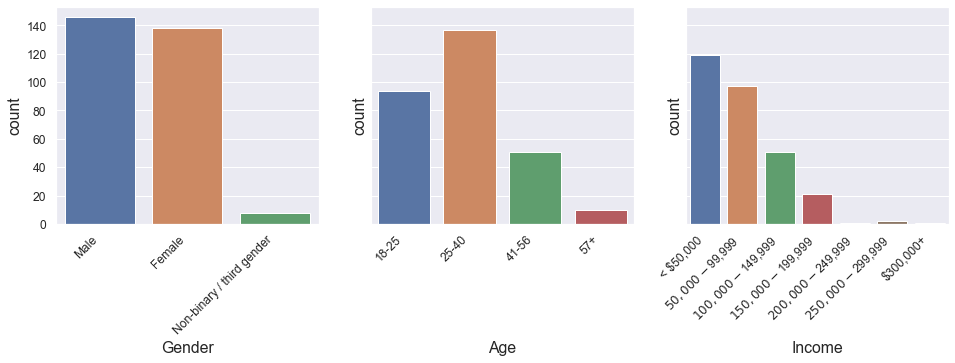

In [9]:
fig, axes = plt.subplots(1,3, figsize=(16,4), sharey=True);
chart = create_countplot(survey_data, "Gender", False, ax=axes[0]);
chart = create_countplot(survey_data, "Age", False, order=["18-25", "25-40", "41-56", "57+"], ax=axes[1]);
chart = create_countplot(survey_data, "Income", False, 
                order=[
                    '< $50,000', 
                    '$50,000 -$99,999', 
                    '$100,000 - $149,999',
                    '$150,000 - $199,999', 
                    '$200,000 - $249,999',
                    '$250,000 - $299,999', 
                    '$300,000+',
                ],
                ax=axes[2]
               );

#axes[0].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[1].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[2].yaxis.set_tick_params(which='both', labelbottom=True)
fig.align_xlabels(axes)
save_figure(fig, 'Gender_Age_Income');

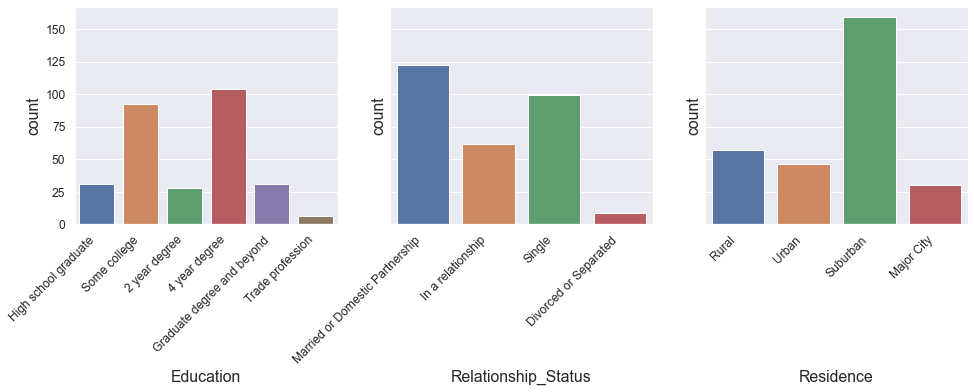

In [10]:
fig, axes = plt.subplots(1,3, figsize=(16,4), sharey=True);
create_countplot(survey_data, "Education", False, 
                order=[
                    'High school graduate',
                    'Some college', 
                    '2 year degree', 
                    '4 year degree',
                    'Graduate degree and beyond', 
                    'Trade profession'
                ],
                ax=axes[0]
               )
create_countplot(survey_data, "Relationship_Status", False, ax=axes[1])
create_countplot(survey_data, "Residence", False, ax=axes[2])

#axes[0].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[1].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[2].yaxis.set_tick_params(which='both', labelbottom=True)
fig.align_xlabels(axes)
save_figure(fig, 'Education_Relationship_Residence');

## Dog Information

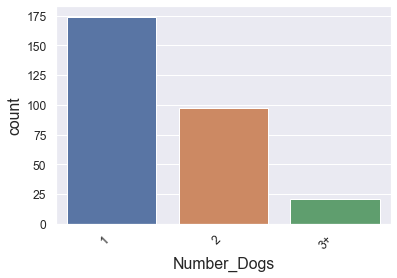

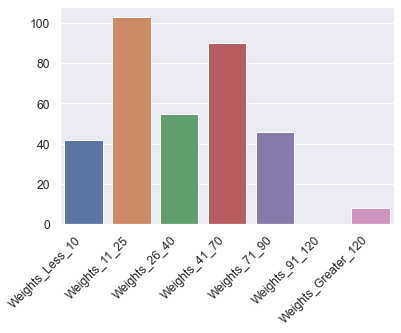

In [11]:
#Number_Dogs                        object
#Dog_Weights                        object
#Weights_Less_10                      bool
#Weights_11_25                        bool
#Weights_26_40                        bool
#Weights_41_70                        bool
#Weights_71_90                        bool
#Weights_91_120                       bool
#Weights_Greater_120                  bool
create_countplot(survey_data, "Number_Dogs", True, ["1", "2", "3+"])

columns = ["Weights_Less_10", 
           "Weights_11_25",
           "Weights_26_40",
           "Weights_41_70",
           "Weights_71_90",
           "Weights_91_120", 
           "Weights_Greater_120"];
Weights = survey_data[survey_data==True][columns].count();
chart = sns.barplot(y=Weights.values, x=Weights.index);
rotate_xlabels(chart)
save_figure(chart.get_figure(), 'Dog_Weights');

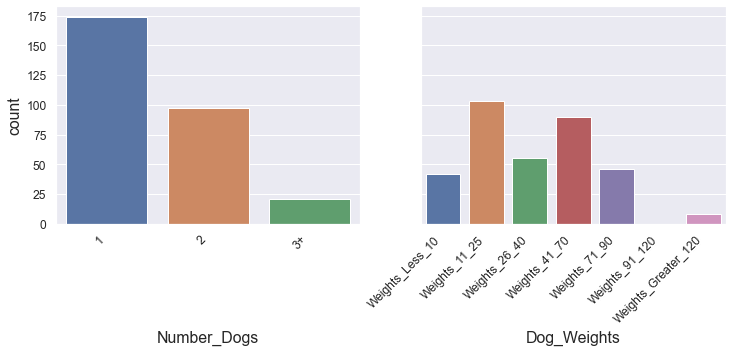

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True);
create_countplot(survey_data, "Number_Dogs", False, ["1", "2", "3+"], ax=axes[0])

columns = ["Weights_Less_10", 
           "Weights_11_25",
           "Weights_26_40",
           "Weights_41_70",
           "Weights_71_90",
           "Weights_91_120", 
           "Weights_Greater_120"];
Weights = survey_data[survey_data==True][columns].count();
chart = sns.barplot(y=Weights.values, x=Weights.index, ax=axes[1]);
chart.set_xlabel("Dog_Weights")
rotate_xlabels(chart)
increase_axes(chart)

#axes[0].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[1].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[2].yaxis.set_tick_params(which='both', labelbottom=True)
fig.align_xlabels(axes)
save_figure(fig, 'Number_Dog_Weights');

## Other Information

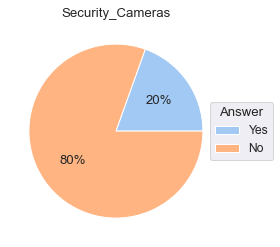

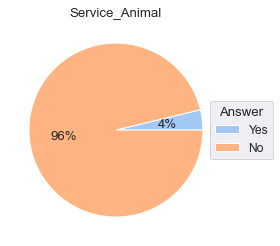

In [91]:
#Security_Cameras                   object
#Service_Animal                     object
create_pie_chart(survey_data, "Security_Cameras", True);
create_pie_chart(survey_data, "Service_Animal", True);

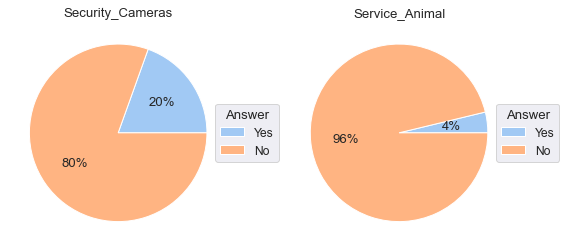

In [103]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

create_pie_chart(survey_data, "Security_Cameras", False, ax=axes[0])
create_pie_chart(survey_data, "Service_Animal", False, ax=axes[1])
fig.tight_layout()

save_figure(chart.get_figure(), "Other_Combined")
plt.show()

## Dog Spend

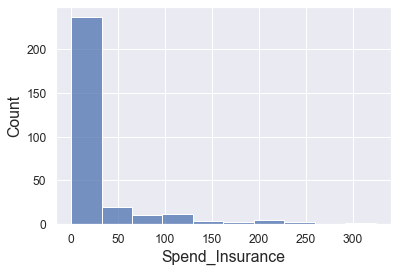

count    291.000000
mean      19.573883
std       48.304821
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      324.000000
Name: Spend_Insurance, dtype: float64

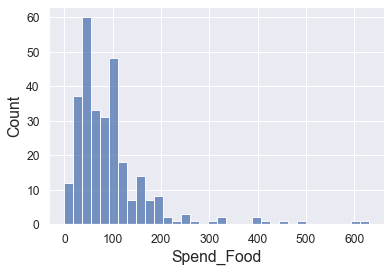

count    292.000000
mean      94.554795
std       83.882714
min        0.000000
25%       46.000000
50%       76.000000
75%      109.250000
max      630.000000
Name: Spend_Food, dtype: float64

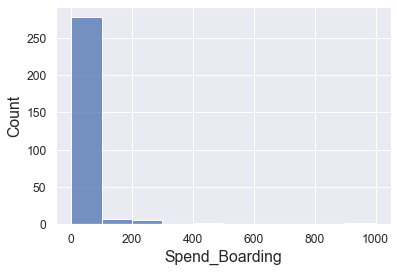

count     292.000000
mean       15.924658
std        73.290655
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1000.000000
Name: Spend_Boarding, dtype: float64

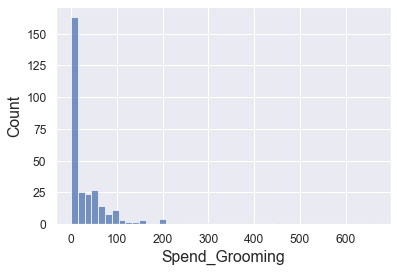

count    292.000000
mean      33.534247
std       64.536163
min        0.000000
25%        0.000000
50%        6.000000
75%       49.250000
max      665.000000
Name: Spend_Grooming, dtype: float64

In [15]:
#Spend_Insurance                   float64
#Spend_Food                        float64
#Spend_Boarding                    float64
#Spend_Grooming                    float64
column = "Spend_Insurance";
survey_data_filtered = survey_data[survey_data[column]<700][column]
create_histogram(survey_data_filtered, column, True)
display(survey_data_filtered.describe());
insurance = survey_data_filtered

column = "Spend_Food";
survey_data_filtered = survey_data[survey_data[column]<math.inf][column]
create_histogram(survey_data_filtered, column, True)
display(survey_data_filtered.describe());
food = survey_data_filtered

column = "Spend_Boarding";
survey_data_filtered = survey_data[survey_data[column]<math.inf][column]
create_histogram(survey_data_filtered, column, True)
display(survey_data_filtered.describe());

column = "Spend_Grooming";
survey_data_filtered = survey_data[survey_data[column]<math.inf][column]
create_histogram(survey_data_filtered, column, True)
display(survey_data_filtered.describe());

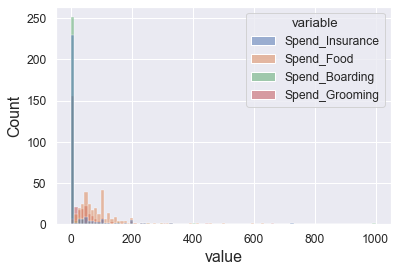

,Spend_Insurance,Spend_Food,Spend_Boarding,Spend_Grooming
count,292.000000,292.000000,292.000000,292.000000
mean,21.989726,94.554795,15.924658,33.534247
std,63.478626,83.882714,73.290655,64.536163
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,46.000000,0.000000,0.000000
50%,0.000000,76.000000,0.000000,6.000000
75%,0.000000,109.250000,0.000000,49.250000
max,725.000000,630.000000,1000.000000,665.000000


In [16]:
columns = ["Spend_Insurance", "Spend_Food", "Spend_Boarding", "Spend_Grooming"]
spend_combined = pd.melt(survey_data[columns])
chart = sns.histplot(data=spend_combined, x="value", hue="variable")
increase_axes(chart);
save_figure(chart.get_figure(), "Spend_Combined")
plt.show()

survey_data[columns].describe()

Spend_Insurance    21.989726
Spend_Food         94.554795
Spend_Boarding     15.924658
Spend_Grooming     33.534247
dtype: float64

,Spend_Insurance,Spend_Food,Spend_Boarding,Spend_Grooming
0,21.989726,94.554795,15.924658,33.534247


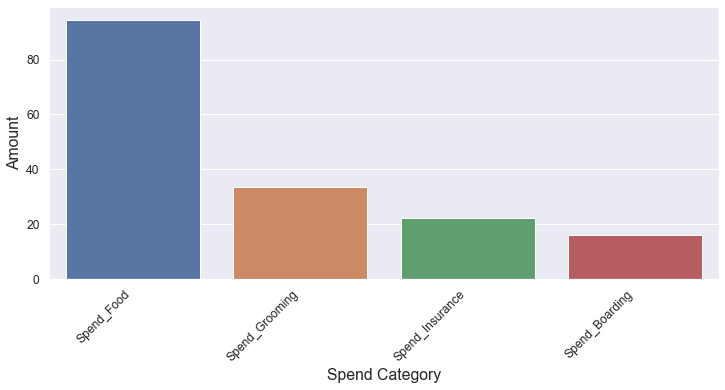

In [17]:
survey_data[columns].describe()
means = survey_data[columns].mean()
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

display(means)
display(means_df)

fig = plt.figure(figsize=(12,5))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));
chart.set_xlabel("Spend Category");
chart.set_ylabel("Amount");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Spend_Category_Means")

In [18]:
spend_category = pd.DataFrame(columns=columns);
spend_category = survey_data[columns];
variable = "Effective";
value = "Score"
anova_analysis(spend_category, columns, variable, value);

Overall model F( 3, 1164) =  73.946, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Effective),1.142600e+06,3.0,73.946495,8.851348e-44
Residual,5.995264e+06,1164.0,NaN,NaN


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2     meandiff p-adj   lower    upper   reject
-----------------------------------------------------------------------
Spend_Boarding      Spend_Food  78.6301  0.001  63.3492  93.9111   True
Spend_Boarding  Spend_Grooming  17.6096 0.0163   2.3286  32.8906   True
Spend_Boarding Spend_Insurance   6.0651 0.7121  -9.2159   21.346  False
    Spend_Food  Spend_Grooming -61.0205  0.001 -76.3015 -45.7396   True
    Spend_Food Spend_Insurance -72.5651  0.001  -87.846 -57.2841   True
Spend_Grooming Spend_Insurance -11.5445 0.2105 -26.8255   3.7365  False
-----------------------------------------------------------------------


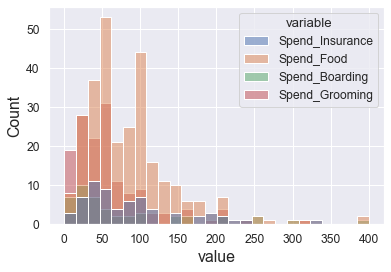

In [19]:
column="value"
spend_combined_filtered = spend_combined[spend_combined[column].between(1, 400)][["variable","value"]]
chart = sns.histplot(data=spend_combined_filtered, x="value", hue="variable")
increase_axes(chart);
save_figure(chart.get_figure(), "Spend_Combined_Filtered")

## Car Seats

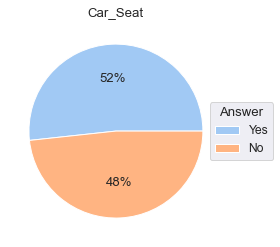

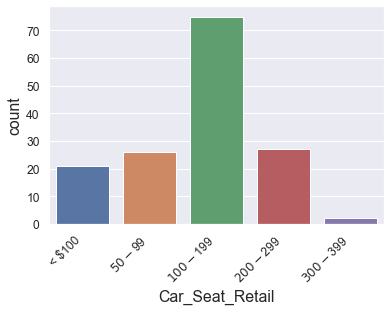

<AxesSubplot:xlabel='Car_Seat_Retail', ylabel='count'>

In [100]:
#Car_Seat                           object
#Car_Seat_Retail                    object
create_pie_chart(survey_data, "Car_Seat", True)
create_countplot(survey_data, "Car_Seat_Retail", True,
                [
                    '< $100', 
                    '$50 - $99',
                    '$100 - $199', 
                    '$200 - $299', 
                    '$300 - $399'
                ]
                )

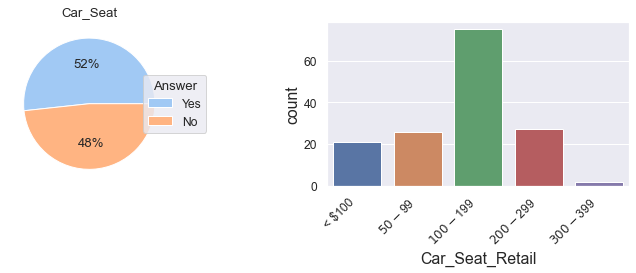

In [104]:
fig, axes = plt.subplots(1,2, figsize=(10,4));
create_pie_chart(survey_data, "Car_Seat", False, ax=axes[0])
create_countplot(survey_data, "Car_Seat_Retail", False,
                [
                    '< $100', 
                    '$50 - $99',
                    '$100 - $199', 
                    '$200 - $299', 
                    '$300 - $399'
                ], ax=axes[1]
                )

#axes[0].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[1].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[2].yaxis.set_tick_params(which='both', labelbottom=True)
fig.tight_layout()
fig.align_xlabels(axes)
save_figure(fig, 'Car_Seat_Car_Seat_Retail');

## Activity

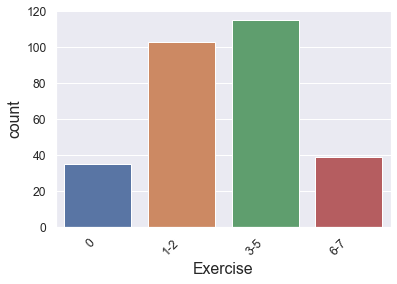

<AxesSubplot:xlabel='Exercise', ylabel='count'>

In [22]:
#Exercise                           object
#Activities_Walk                     int64
#Activities_Run                      int64
#Activities_Hunt                     int64
#Activities_Dog_Parks                int64
#Activities_Outdoor_Adventures       int64
#Activities_Shopping                 int64
#Activities_Vacation                 int64
#Walking_Assistance                 object
#Vehicle_Types                      object

create_countplot(survey_data, "Exercise", True, ["0", "1-2", "3-5", "6-7"])

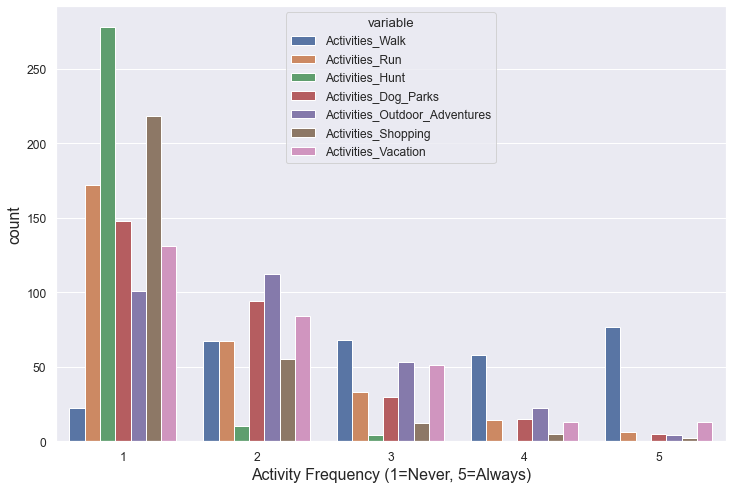

In [44]:
columns = ["Activities_Walk", "Activities_Run", "Activities_Hunt", "Activities_Dog_Parks",
          "Activities_Outdoor_Adventures","Activities_Shopping","Activities_Vacation"]
activities_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=activities_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("Activity Frequency (1=Never, 5=Always)")
save_figure(chart.get_figure(), "Activities")
plt.show()

,Activities_Walk,Activities_Run,Activities_Hunt,Activities_Dog_Parks,Activities_Outdoor_Adventures,Activities_Shopping,Activities_Vacation
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,3.345890,1.681507,1.061644,1.750000,2.027397,1.349315,1.948630
std,1.292411,0.990297,0.292462,0.953831,0.977023,0.704355,1.097059
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
75%,5.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000
max,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000


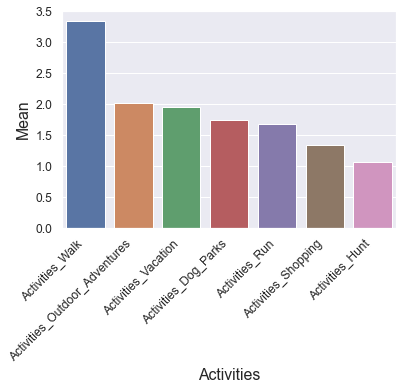

In [45]:
activities = pd.DataFrame(columns=columns)
activities = survey_data[columns]
display(activities.describe());
means = activities.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

order=means_df.sort_values(by=0, axis=1, ascending=False)
chart = sns.barplot(x=means.index, y=means, order=order);
chart.set_xlabel("Activities");
chart.set_ylabel("Mean");
increase_axes(chart)
rotate_xlabels(chart)
save_figure(chart.get_figure(), "Activities_Means")

In [46]:
variable = "Effective";
value = "Score"
anova_analysis(activities, columns, variable, value);

Overall model F( 6, 2037) =  172.097, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Effective),929.407045,6.0,172.096856,2.448066e-177
Residual,1833.465753,2037.0,NaN,NaN


                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
            group1                        group2            meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------
         Activities_Dog_Parks               Activities_Hunt  -0.6884  0.001 -0.9201 -0.4566   True
         Activities_Dog_Parks Activities_Outdoor_Adventures   0.2774 0.0077  0.0457  0.5091   True
         Activities_Dog_Parks                Activities_Run  -0.0685    0.9 -0.3002  0.1632  False
         Activities_Dog_Parks           Activities_Shopping  -0.4007  0.001 -0.6324  -0.169   True
         Activities_Dog_Parks           Activities_Vacation   0.1986 0.1491 -0.0331  0.4304  False
         Activities_Dog_Parks               Activities_Walk   1.5959  0.001  1.3642  1.8276   True
              Activities_Hunt Activities_Outdoor_Adventures   0.9658  0.001   0.734  1.1975   True
          

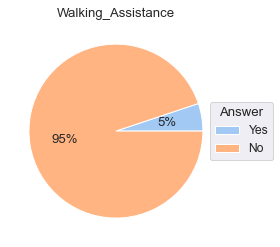

<AxesSubplot:title={'center':'Walking_Assistance'}>

In [105]:
create_pie_chart(survey_data, "Walking_Assistance", True)

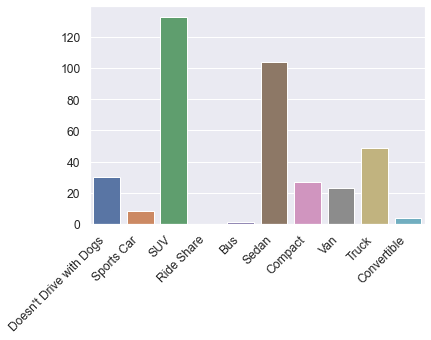

In [26]:
VEHICLE_NONE = "Doesn't Drive with Dogs"
VEHICLE_SPORTS = "Sports Car"
VEHICLE_SUV = "SUV"
VEHICLE_RIDE_SHARE = "Ride Share"
VEHICLE_BUS = "Bus"
VEHICLE_SEDAN = "Sedan"
VEHICLE_COMPACT = "Compact"
VEHICLE_VAN = "Van"
VEHICLE_TRUCK = "Truck"
VEHICLE_CONVERTIBLE = "Convertible"

columns = [VEHICLE_NONE, VEHICLE_SPORTS, VEHICLE_SUV, VEHICLE_RIDE_SHARE, VEHICLE_BUS,
          VEHICLE_SEDAN, VEHICLE_COMPACT, VEHICLE_VAN, VEHICLE_TRUCK, VEHICLE_CONVERTIBLE]
vehicle_data = pd.DataFrame(columns=columns)
vehicle_data[VEHICLE_NONE] = survey_data["Vehicle_Types"].str.contains("do not")
vehicle_data[VEHICLE_SPORTS] = survey_data["Vehicle_Types"].str.contains("Sports")
vehicle_data[VEHICLE_SUV] = survey_data["Vehicle_Types"].str.contains("SUV")
vehicle_data[VEHICLE_RIDE_SHARE] = survey_data["Vehicle_Types"].str.contains("Taxi")
vehicle_data[VEHICLE_BUS] = survey_data["Vehicle_Types"].str.contains("Bus")
vehicle_data[VEHICLE_SEDAN] = survey_data["Vehicle_Types"].str.contains("Sedan")
vehicle_data[VEHICLE_COMPACT] = survey_data["Vehicle_Types"].str.contains("Compact")
vehicle_data[VEHICLE_VAN] = survey_data["Vehicle_Types"].str.contains("van")
vehicle_data[VEHICLE_TRUCK] = survey_data["Vehicle_Types"].str.contains("Truck")
vehicle_data[VEHICLE_CONVERTIBLE] = survey_data["Vehicle_Types"].str.contains("Convertible")

Vehicles = vehicle_data[vehicle_data==True][columns].count();
chart = sns.barplot(y=Vehicles.values, x=Vehicles.index);
rotate_xlabels(chart)
save_figure(chart.get_figure(), 'Vehicles');

## Concerns

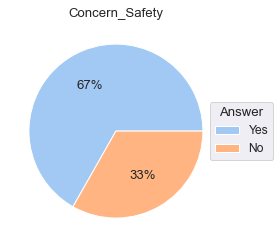

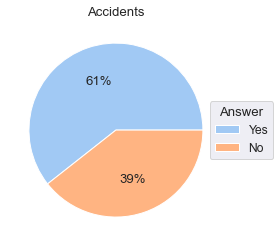

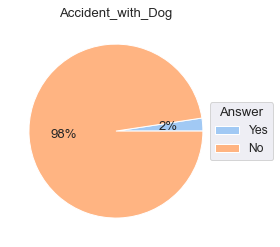

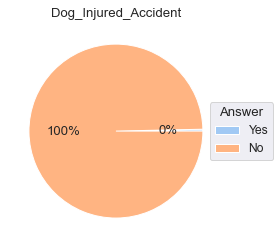

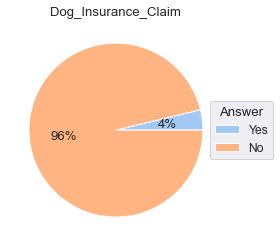

<AxesSubplot:title={'center':'Dog_Insurance_Claim'}>

In [106]:
#Concern_Safety                     object
#Accidents                          object
#Accident_with_Dog                  object
#Dog_Injured_Accident               object
#Dog_Insurance_Claim                object
create_pie_chart(survey_data, "Concern_Safety", True)
create_pie_chart(survey_data, "Accidents", True)
create_pie_chart(survey_data, "Accident_with_Dog", True)
create_pie_chart(survey_data, "Dog_Injured_Accident", True)
create_pie_chart(survey_data, "Dog_Insurance_Claim", True)

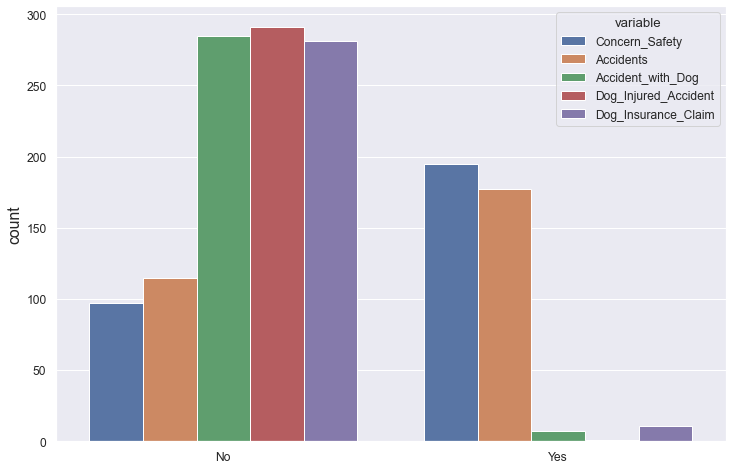

In [28]:
columns = ["Concern_Safety", "Accidents", "Accident_with_Dog", "Dog_Injured_Accident", "Dog_Insurance_Claim"]
concerns_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=concerns_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("")
save_figure(chart.get_figure(), "Concerns_Combined")
plt.show()

## Restraint

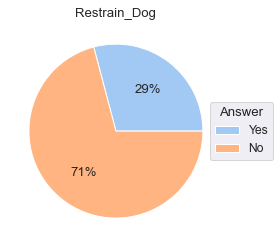

29.10958904109589

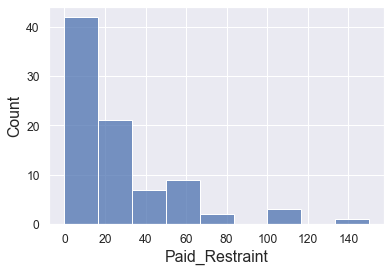

count     85.000000
mean      24.529294
std       28.733050
min        0.000000
25%        0.000000
50%       20.000000
75%       40.000000
max      150.000000
Name: Paid_Restraint, dtype: float64

In [107]:
# Restrain_Dog                       object
# Paid_Restraint                    float64
create_pie_chart(survey_data, "Restrain_Dog", True)

restrain_yes = survey_data[survey_data["Restrain_Dog"]=="Yes"]["Restrain_Dog"].count();
display(restrain_yes/n_participants*100)

column = "Paid_Restraint";
create_histogram(survey_data[column], column, True)
survey_data[column].describe()

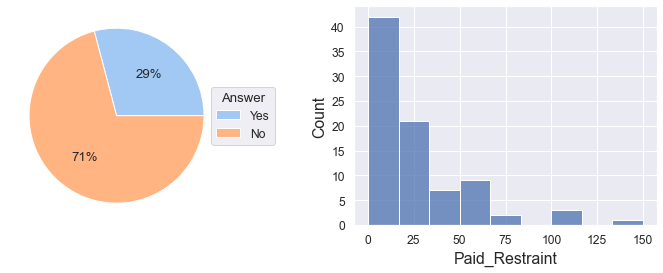

In [86]:
fig, axes = plt.subplots(1,2, figsize=(10,4));

create_pie_chart(survey_data, "Restrain_Dog", False, ax=axes[0])

column = "Paid_Restraint";
create_histogram(survey_data[column], column, False, ax=axes[1])
survey_data[column].describe()

#axes[0].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[1].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[2].yaxis.set_tick_params(which='both', labelbottom=True)
fig.align_xlabels(axes)
fig.tight_layout()
save_figure(fig, 'Restrain_Dog_Paid_Restraint');

## Impact on Decision Making

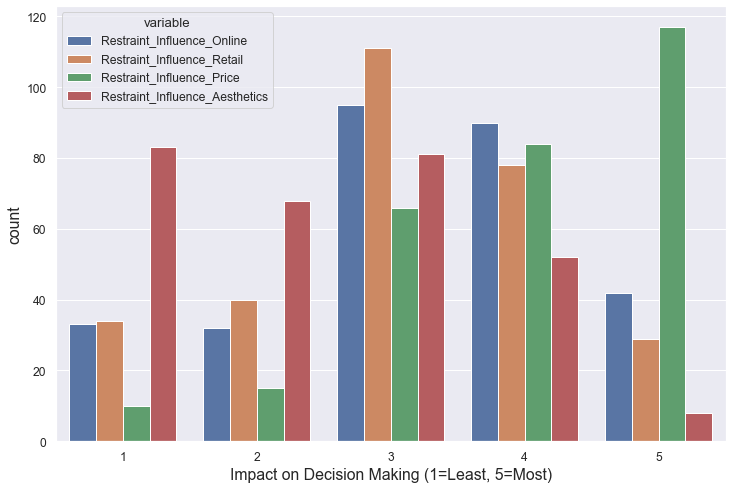

In [32]:
#Restraint_Influence_Online          int64
#Restraint_Influence_Retail          int64
#Restraint_Influence_Price           int64
#Restraint_Influence_Aesthetics      int64

columns = ["Restraint_Influence_Online", "Restraint_Influence_Retail", 
           "Restraint_Influence_Price", "Restraint_Influence_Aesthetics"]
influence_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=influence_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("Impact on Decision Making (1=Least, 5=Most)")
save_figure(chart.get_figure(), "Influences")
plt.show()

,Restraint_Influence_Online,Restraint_Influence_Retail,Restraint_Influence_Price,Restraint_Influence_Aesthetics
count,292.000000,292.000000,292.000000,292.000000
mean,3.260274,3.095890,3.969178,2.431507
std,1.175669,1.123499,1.069288,1.157124
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,2.000000
75%,4.000000,4.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000


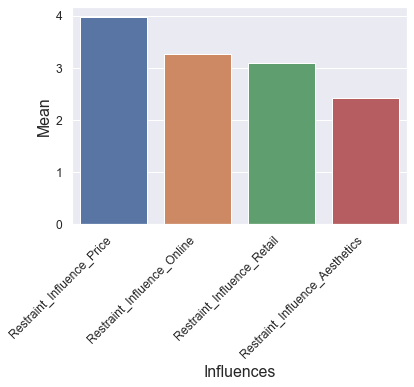

In [33]:
influences = pd.DataFrame(columns=columns)
influences = survey_data[columns]
display(influences.describe());
means = influences.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

order=means_df.sort_values(by=0, axis=1, ascending=False)
chart = sns.barplot(x=means.index, y=means, order=order);
chart.set_xlabel("Influences");
chart.set_ylabel("Mean");
increase_axes(chart)
rotate_xlabels(chart)
save_figure(chart.get_figure(), "Influences_Means")

In [34]:
variable = "Effective";
value = "Score"
anova_analysis(influences, columns, variable, value);

Overall model F( 3, 1164) =  90.843, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Effective),349.297089,3.0,90.842853,8.008659e-53
Residual,1491.886986,1164.0,NaN,NaN


                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
            group1                       group2           meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
Restraint_Influence_Aesthetics Restraint_Influence_Online   0.8288  0.001  0.5877  1.0698   True
Restraint_Influence_Aesthetics  Restraint_Influence_Price   1.5377  0.001  1.2966  1.7787   True
Restraint_Influence_Aesthetics Restraint_Influence_Retail   0.6644  0.001  0.4233  0.9054   True
    Restraint_Influence_Online  Restraint_Influence_Price   0.7089  0.001  0.4678    0.95   True
    Restraint_Influence_Online Restraint_Influence_Retail  -0.1644 0.2963 -0.4054  0.0767  False
     Restraint_Influence_Price Restraint_Influence_Retail  -0.8733  0.001 -1.1143 -0.6322   True
------------------------------------------------------------------------------------------------


## Feature Importance

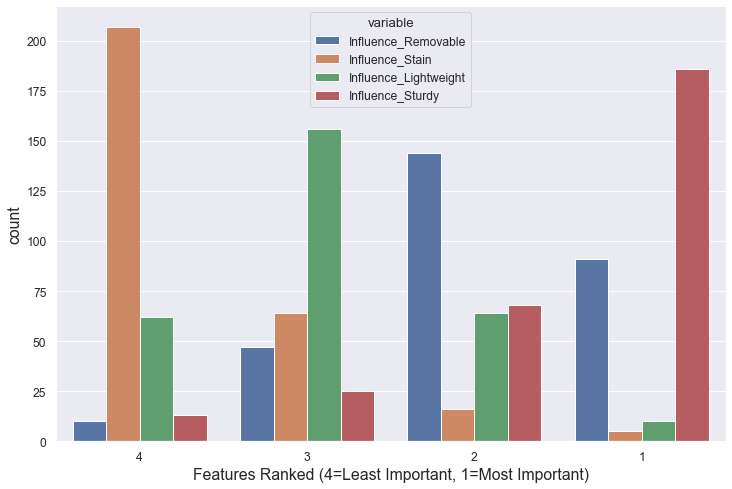

In [35]:
#Influence_Removable                 int64
#Influence_Stain                     int64
#Influence_Lightweight               int64
#Influence_Sturdy                    int64

columns = ["Influence_Removable", "Influence_Stain", 
           "Influence_Lightweight", "Influence_Sturdy"]
rank_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=rank_combined, x="value", hue="variable", order=[4, 3, 2, 1])
increase_axes(chart);
chart.set_xlabel("Features Ranked (4=Least Important, 1=Most Important)")
save_figure(chart.get_figure(), "Ranked")
plt.show()

,Influence_Removable,Influence_Stain,Influence_Lightweight,Influence_Sturdy
count,292.000000,292.000000,292.000000,292.000000
mean,1.917808,3.619863,2.924658,1.537671
std,0.777756,0.670448,0.751499,0.830240
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,1.000000
50%,2.000000,4.000000,3.000000,1.000000
75%,2.000000,4.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000


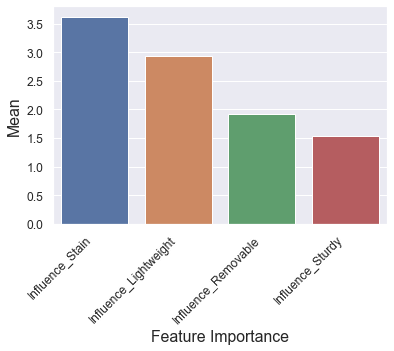

In [36]:
importance = pd.DataFrame(columns=columns)
importance = survey_data[columns]
display(importance.describe());
means = importance.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

order=means_df.sort_values(by=0, axis=1, ascending=False)
chart = sns.barplot(x=means.index, y=means, order=order);
chart.set_xlabel("Feature Importance");
chart.set_ylabel("Mean");
increase_axes(chart)
rotate_xlabels(chart)
save_figure(chart.get_figure(), "Importance_Means")

In [37]:
variable = "Effective";
value = "Score"
anova_analysis(importance, columns, variable, value);

Overall model F( 3, 1164) =  455.277, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Effective),788.239726,3.0,455.277017,1.221903e-195
Residual,671.760274,1164.0,NaN,NaN


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
        group1               group2       meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------------
Influence_Lightweight Influence_Removable  -1.0068 0.001 -1.1686 -0.8451   True
Influence_Lightweight     Influence_Stain   0.6952 0.001  0.5335   0.857   True
Influence_Lightweight    Influence_Sturdy   -1.387 0.001 -1.5487 -1.2252   True
  Influence_Removable     Influence_Stain   1.7021 0.001  1.5403  1.8638   True
  Influence_Removable    Influence_Sturdy  -0.3801 0.001 -0.5419 -0.2184   True
      Influence_Stain    Influence_Sturdy  -2.0822 0.001 -2.2439 -1.9204   True
-------------------------------------------------------------------------------


## Willingness to Pay

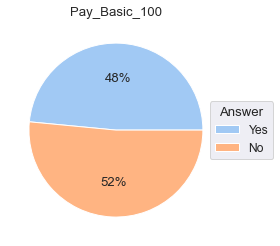

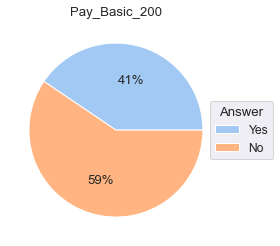

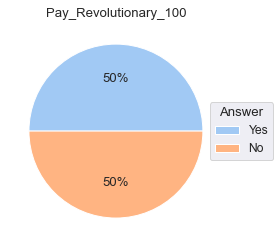

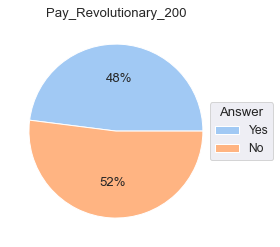

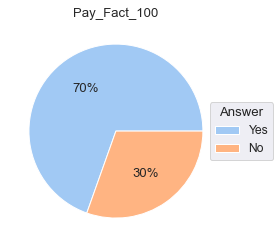

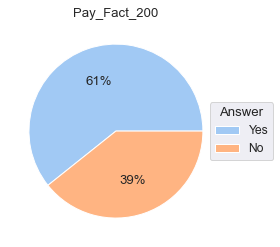

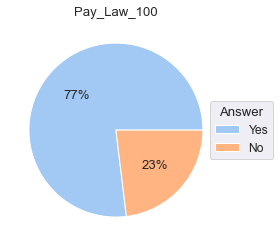

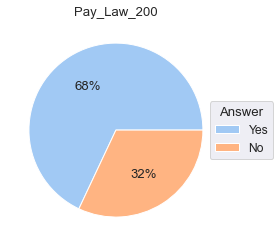

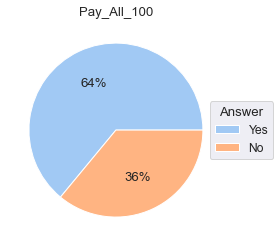

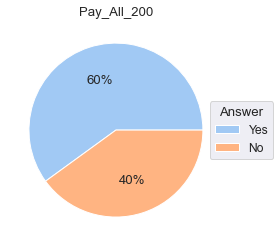

In [108]:
#Pay_Basic_100                      object
#Pay_Basic_200                      object
#Pay_Revolutionary_100              object
#Pay_Revolutionary_200              object
#Pay_Fact_100                       object
#Pay_Fact_200                       object
#Pay_Law_100                        object
#Pay_Law_200                        object
#Pay_All_100                        object
#Pay_All_200                        object
create_pie_chart(survey_data, "Pay_Basic_100", True);
create_pie_chart(survey_data, "Pay_Basic_200", True);
create_pie_chart(survey_data, "Pay_Revolutionary_100", True);
create_pie_chart(survey_data, "Pay_Revolutionary_200", True);
create_pie_chart(survey_data, "Pay_Fact_100", True);
create_pie_chart(survey_data, "Pay_Fact_200", True);
create_pie_chart(survey_data, "Pay_Law_100", True);
create_pie_chart(survey_data, "Pay_Law_200", True);
create_pie_chart(survey_data, "Pay_All_100", True);
create_pie_chart(survey_data, "Pay_All_200", True);


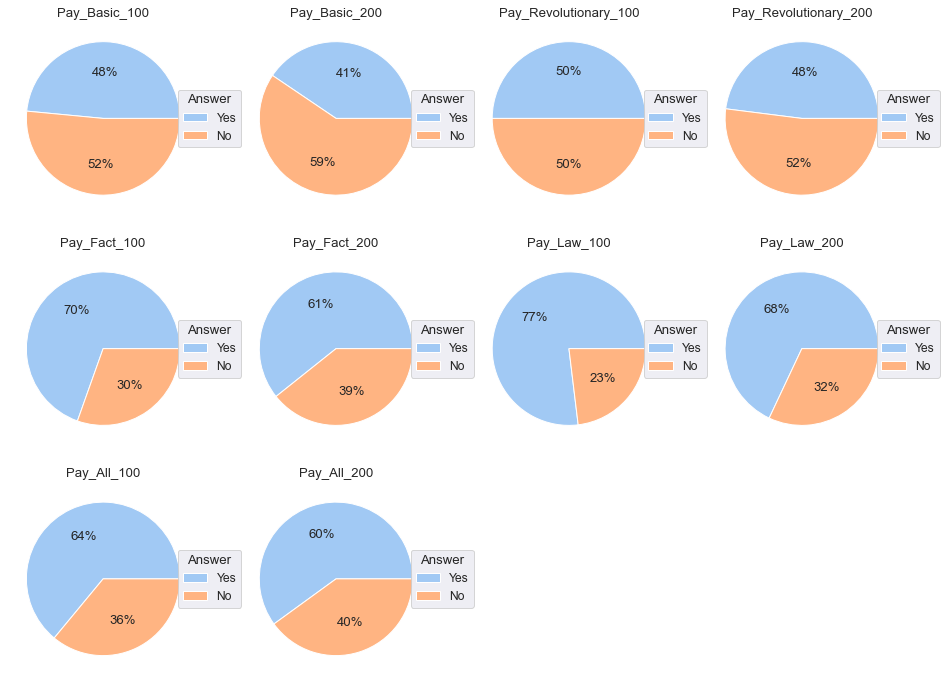

In [124]:
#Pay_Basic_100                      object
#Pay_Basic_200                      object
#Pay_Revolutionary_100              object
#Pay_Revolutionary_200              object
#Pay_Fact_100                       object
#Pay_Fact_200                       object
#Pay_Law_100                        object
#Pay_Law_200                        object
#Pay_All_100                        object
#Pay_All_200                        object

fig, axes = plt.subplots(3,4, figsize=(16,12));

create_pie_chart(survey_data, "Pay_Basic_100", False, ax=axes[0][0]);
create_pie_chart(survey_data, "Pay_Basic_200", False, ax=axes[0][1]);
create_pie_chart(survey_data, "Pay_Revolutionary_100", False, ax=axes[0][2]);
create_pie_chart(survey_data, "Pay_Revolutionary_200", False, ax=axes[0][3]);
create_pie_chart(survey_data, "Pay_Fact_100", False, ax=axes[1][0]);
create_pie_chart(survey_data, "Pay_Fact_200", False, ax=axes[1][1]);
create_pie_chart(survey_data, "Pay_Law_100", False, ax=axes[1][2]);
create_pie_chart(survey_data, "Pay_Law_200", False, ax=axes[1][3]);
create_pie_chart(survey_data, "Pay_All_100", False, ax=axes[2][0]);
create_pie_chart(survey_data, "Pay_All_200", False, ax=axes[2][1]);
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

#fig.subplots_adjust(hspace=0.4)

#axes[0].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[1].yaxis.set_tick_params(which='both', labelbottom=True)
#axes[2].yaxis.set_tick_params(which='both', labelbottom=True)
fig.align_xlabels(axes)
save_figure(fig, 'Pay_Comparison');


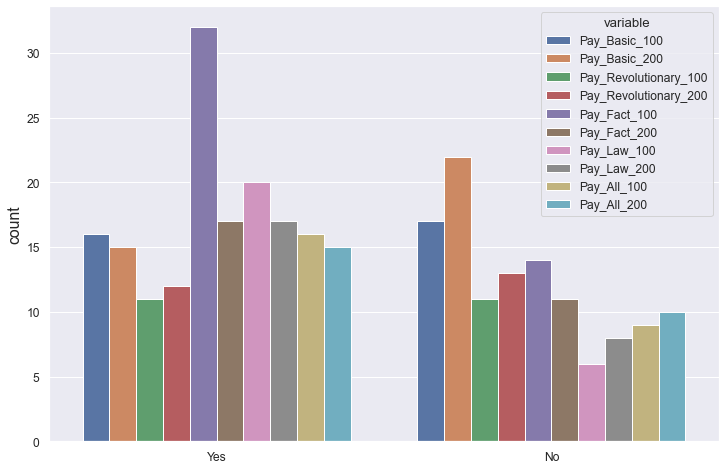

In [40]:
columns = ["Pay_Basic_100", "Pay_Basic_200", "Pay_Revolutionary_100", "Pay_Revolutionary_200",
           "Pay_Fact_100", "Pay_Fact_200", "Pay_Law_100", "Pay_Law_200", "Pay_All_100", "Pay_All_200"]
wtp_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=wtp_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("")
save_figure(chart.get_figure(), "Willingness_To_Pay_Combined")
plt.show()

In [41]:
# percent of owners who said they would buy after asking
n_yes_total = 0
for c in columns:
    n_yes = survey_data[survey_data[c]=="Yes"][c].count()
    n_yes_total = n_yes_total + n_yes
display(n_yes_total/n_participants*100)

58.56164383561644

<Figure size 576x360 with 0 Axes>

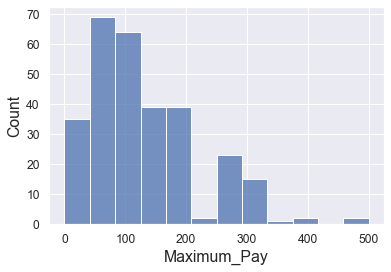

count    291.000000
mean     128.000000
std       89.642778
min        0.000000
25%       50.000000
50%      100.000000
75%      200.000000
max      500.000000
Name: Maximum_Pay, dtype: float64

In [109]:
column = "Maximum_Pay";
fig = plt.figure(figsize=(8,5));
survey_data_filtered = survey_data[survey_data[column]<1000][column]
create_histogram(survey_data_filtered, column, True)
survey_data_filtered.describe()

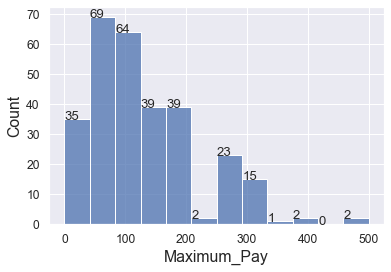

In [114]:
# display same data w/ numbers
chart = create_histogram(survey_data_filtered, column, False, show_labels=True)